In [1]:
# Austin Placinto
# Date: 10/23/2019
# I have neither given nor received any unauhorized aid in completing this work,
# nor have I presented someone else's work as my own.

import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

## Homework 7

In [2]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images2 = train_images.reshape((60000, 28, 28, 1)) # 4D standard image shape
train_images2 = train_images2.astype('float32') / 255

test_images2 = test_images.reshape((10000, 28, 28, 1))
test_images2 = test_images2.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 32 - num of filters
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # 64 => 32. Got better acc...
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images2, train_labels, epochs=5, batch_size=64, 
                    validation_data=(test_images2, test_labels))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 16s 261us/step - loss: 0.5768 - acc: 0.7835 - val_loss: 0.4237 - val_acc: 0.8464
Epoch 2/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.3553 - acc: 0.8687 - val_loss: 0.3653 - val_acc: 0.8622
Epoch 3/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.2986 - acc: 0.8895 - val_loss: 0.3176 - val_acc: 0.8854
Epoch 4/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.2650 - acc: 0.9022 - val_loss: 0.2984 - val_acc: 0.8905
Epoch 5/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.2424 - acc: 0.9104 - val_loss: 0.2783 - val_acc: 0.8999


In [4]:
test_loss, test_acc = model.evaluate(test_images2, test_labels)
test_acc

10000/10000 [==============================] - 1s 77us/step


0.8999

##Graphs

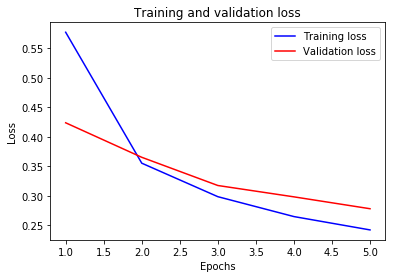

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'b', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

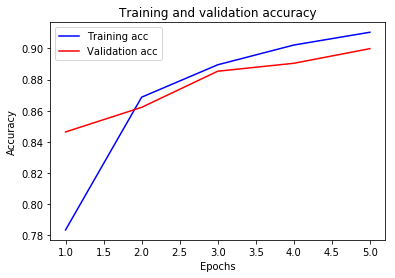

In [6]:
plt.clf()   # clear figure
acc = history.history['acc']
val_acc = history.history['val_acc']

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

##Examples

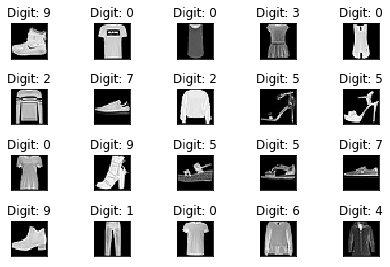

In [7]:
import matplotlib.pyplot as plt
import numpy as np
#plt.figure(figsize=(5,5))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray')
  plt.title("Digit: {}".format(np.argmax(model.predict(np.array([train_images2[i]])))))
  plt.xticks([])
  plt.yticks([])

2   Pullover


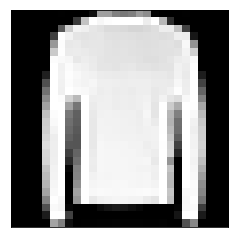

In [8]:
import numpy as np

fashion_index = {0: "T-Shirt", 1: "Trousers", 2: "Pullover", 3: "Dress",
                     4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker",
                     8: "Bag", 9: "Ankle Boot"}

plt.imshow(test_images[77], cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
item = np.argmax(model.predict(np.array([test_images2[77]]))) 
print(item, " ", fashion_index[item])
